**Inclass: Regression Model**
- Durasi: 7 hours
- _Last Updated_: Desember 2023

___

- Disusun dan dikurasi oleh tim produk dan instruktur [Algoritma Data Science School](https://algorit.ma).

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
from helper import linearity_test

# Introduction

Machine learning bertujuan untuk membuat mesin yang belajar berdasarkan data. Machine learning terbagi dua:

<img src="assets/supervised_unsupervised.png" width="900">


**Supervised Learning**: 

* memiliki target variable. 
* untuk pembuatan model prediksi (y ~ x)
* ada ground truth (label aktual) sehingga ada evaluasi model

**Unsupervised Learning**: 

* tidak memiliki target variable. 
* untuk mencari pola dalam data sehingga menghasilkan informasi yang berguna/dapat diolah lebih lanjut. umumnya dipakai untuk tahap explanatory data analysis (EDA)/data pre-processing.
* tidak ada ground truth sehingga tidak ada evaluasi model 

# Regression Model

Regression model merupakan **Supervised Learning** karena data yang dibutuhkan harus memiliki target variabel (y). Target variabel dari Regression Model harus bertipe numerik, namun untuk prediktornya (x) boleh numerik/kategorik

📝**Business Problem**

Pemilihan variabel target biasanya dikaitkan dengan masalah bisnis yang ingin diselesaikan:

1. Sebuah dealer mobil berusaha membangun sebuah model untuk memprediksi harga mobil untuk digunakan sebagai patokan ketika membuka harga transaksi. Untuk itu mereka mengembangkan sebuah model dengan:

     * Variabel target: harga mobil
     * Variabel prediktor: tahun produksi, model, km, kelengkapan surat2, pernah turun ngga

2. Seorang mahasiswa pertanian diminta untuk melakukan analisis regresi untuk memprediksi produktivitas padi dari berbagai lahan di Pulau Jawa. Untuk itu ia mengembangkan sebuah model dengan:

     * Variabel target:jumlah produksi
     * Variabel prediktor: cuaca, dosis pupuk, intensitas perawatan, jenis tanah, musim hama

# **Regression Modeling Workflow** - Predicting Property Sales Price: in Jakarta, Tangsel, and Depok Area

Sebagai Tim Data di sebuah institusi perbankan, kita diminta untuk melakukan analisis untuk mengetahui prediksi harga properti untuk acuan dasar data credit KPR. 

Keinginan untuk memiliki properti sendiri merupakan impian banyak orang. Selain bisa dijadikan tempat tinggal, memiliki properti di Jakarta dan Depok adalah salah satu aset investasi yang menguntungkan karena harganya yang cenderung naik setiap tahunnya.  

Dalam proses pencarian tempat tinggal idaman ini, beberapa orang mungkin saja mengalami hambatan, yaitu kesulitan dalam mencari tempat tinggal yang sesuai dengan spesifikasi yang diinginkan dan budget yang dimiliki. Banyak orang menemukan tempat tinggal dengan harga yang cukup mahal namun tidak sesuai dengan spesifikasi yang ditawarkan.

***Apakah terdapat sistem yang dapat memberikan referensi harga properti?”*** menjadi tujuan analisis pada pembahasan analisis kita.

## Simple Linear Regression

Pada Simple Linear Regression, kita akan membuat model regresi dengan **satu buah variabel prediktor**. Formula untuk simple linear regression adalah

Formula model simple linear regression:

$$
\hat{y}=\beta_0+\beta_1.x_1
$$

dimana:
- $\hat{y}$ : nilai prediksi target variabel
- $\beta_0$ : nilai intercept (nilai target variabel ketika kita tidak memiliki prediktor sama sekali)
- $\beta_1$ : nilai slope (nilai kemiringan garis regresi / nilai kontribusi prediktor dalam menentukan target variabel)

Bagaimanakah kita mendapatkan garis yang paling representatif terhadap data kita?

> Regresi bekerja berdasarkan konsep **Ordinary Least Square** yang mencari persamaan garis linear dengan nilai **error terkecil**. Error adalah selisih nilai prediksi/nilai pada garis dengan nilai aktual.

<!-- Note: Jika Anda membuka docstring (dokumentasi) untuk fungsi OLS() pada statsmodel, ada keterangan parameter `endog` dan `exog` yang dapat diakses pengertiannya secara lebih lanjut pada [dokumentasi berikut](https://www.statsmodels.org/stable/endog_exog.html) -->

### 1. Import data

Kita akan gunakan data `properti.csv` yang tersimpan di folder data_input. Data yang diambil adalah data hasil scrapping dari website https://www.rumah123.com/

In [2]:
# code ini untuk mengatur pemisah angka ribuan
pd.options.display.float_format = '{:,.3f}'.format

In [3]:
# Data
properti = pd.read_csv("data_input/properti_jual.csv")

In [4]:
properti.head()

,K..Mandi,K..Tidur,L..Bangunan,Sertifikat,Tipe.Properti,Kota,Price
0,3,4,294,SHM - Sertifikat Hak Milik,Rumah,Jakarta Utara,3500000000
1,3,3,78,SHM - Sertifikat Hak Milik,Apartemen,Jakarta Selatan,2500000000
2,1,1,33,HGB - Hak Guna Bangunan,Apartemen,Jakarta Timur,265000000
3,2,2,120,SHM - Sertifikat Hak Milik,Rumah,Jakarta Pusat,2600000000
4,3,3,130,SHM - Sertifikat Hak Milik,Rumah,Depok,1300000000


Berikut deskripsi variabel dari data tersebut:
- `K..Mandi`: Jumlah kamar mandi pada suatu properti

- `K..Tidur`: Jumlah kamar tidur pada suatu properti

- `L..Bangunan`: Luas bangunan properti (m2)

- `Sertifikat`: Jenis sertifikat atas properti yang di jual
    - `Sertifikat Hak Pakai`
    - `Sertifikat Hak Sewa`
    - `Sertifikat lainnya (PPJB, Girik, Adat, dll)`
    - `Sertifikat PPJB`
    - `Sertifikat Hak Milik`
    
- `Tipe.Properti`: Jenis properti yang dijual
    - `Rumah`: Untuk tipe properti rumah
    - `Apartemen`: Untuk tipe properti apartemen
    
- `Kota`: Lokasi kota tempat properti di jual
    - `Depok`
    - `Jakarta Selatan`
    - `Jakarta Timur`
    - `Jakarta Utara`
    - `Jakarta Barat`
    - `Jakarta Pusat`
    - `Tangerang Selatan`
- `Price`: Nominal harga properti yang dijual

### 2. Inspect data berdasarkan tipe datanya

In [5]:
## code here
properti.dtypes

K..Mandi          int64
K..Tidur          int64
L..Bangunan       int64
Sertifikat       object
Tipe.Properti    object
Kota             object
Price             int64
dtype: object

Tipe data yang belum sesuai adalah : 
- Sertifikat, Tipe.Properti, Kota -> kategori

In [6]:
# Object nama kolom kategori
cat_var = ["Sertifikat", "Tipe.Properti", "Kota"]

# Mengubah tipe data dari beberapa kolom
properti[cat_var] = properti[cat_var].astype("category")

In [7]:
# Cek kembali hasil proses perubahan tipe data
properti.dtypes

K..Mandi            int64
K..Tidur            int64
L..Bangunan         int64
Sertifikat       category
Tipe.Properti    category
Kota             category
Price               int64
dtype: object

### 3. Cek missing value

Sangat penting untuk mengidentifikasi apakah terdapat missing value di dataset kita sebelum dilakukan pemodelan machine learning. 
> ❓ Karena missing value dapat mempengaruhi performa model secara signifikan

#### Missing value ada disebabkan karena:
1. Kesalahan koleksi data
2. Permasalahan pada saat preprocessing
3. Sesimple karena data tidak terkumpul oleh sebagian observasi

Metode yang dapat dilakukan untuk mengetahui apakah pada data yang diolah memiliki nilai *missing* dengan menggunakan fungsi `isnull().sum()`.

In [8]:
## melihat nilai missing
properti.isnull().sum()

K..Mandi         0
K..Tidur         0
L..Bangunan      0
Sertifikat       0
Tipe.Properti    0
Kota             0
Price            0
dtype: int64

### 4. 🎯 Mendefinisikan Business Problem

Dari pernyataan bisnis yang diajukan, **kita ingin melakukan prediksi harga properti berdasarkan Luas Bangunan**

❓ Berdasarkan kolom-kolom data, mari kita coba tentukan kolom apa yang akan menjadi *target* dan *prediktor*?

- Variabel target: harga properti
- Variabel prediktor: luas bangunan

### 5. Exploratory Data Analysis (EDA)

* <u>**Descriptive Statistics**</u>

Analisis statistik deskriptif digunakan untuk memberikan **gambaran awal mengenai distribusi dan perilaku data** dengan melihat nilai minimum, nilai maximum, rata – rata (mean), dan standar deviasi dari masing-masing variabel independen dan variabel dependen.

Method `describe()` menampilkan 8 ringkasan statistika deskriptif. Secara default menampilkan ringkasan untuk kolom numerik.

In [9]:
properti.describe()

,K..Mandi,K..Tidur,L..Bangunan,Price
count,"6,287.000","6,287.000","6,287.000","6,287.000"
mean,1.909,2.410,92.866,"1,705,079,211.070"
std,0.948,0.975,66.115,"1,254,170,884.604"
min,1.000,1.000,1.000,"205,000,000.000"
25%,1.000,2.000,41.000,"740,000,000.000"
50%,2.000,2.000,75.000,"1,350,000,000.000"
75%,3.000,3.000,130.000,"2,350,000,000.000"
max,5.000,4.000,600.000,"5,970,000,000.000"


❓ Apakah ada hal yang menarik dari hasil describe di atas?

- luas bangunan minimum = 1
- indikasi outliers di luas bangunan maksimum

In [10]:
properti[properti["L..Bangunan"] < 19]

,K..Mandi,K..Tidur,L..Bangunan,Sertifikat,Tipe.Properti,Kota,Price
177,1,1,18,"Lainnya (PPJB,Girik,Adat,dll)",Apartemen,Jakarta Timur,250000000
282,1,1,17,HP - Hak Pakai,Apartemen,Depok,360000000
557,1,1,14,HGB - Hak Guna Bangunan,Apartemen,Jakarta Utara,290000000
663,4,3,4,"Lainnya (PPJB,Girik,Adat,dll)",Rumah,Jakarta Pusat,3700000000
1074,1,1,16,"Lainnya (PPJB,Girik,Adat,dll)",Apartemen,Jakarta Utara,260000000
1128,1,2,12,"Lainnya (PPJB,Girik,Adat,dll)",Apartemen,Tangerang Selatan,1500000000
1363,1,1,17,"Lainnya (PPJB,Girik,Adat,dll)",Apartemen,Depok,270000000
1436,1,2,12,"Lainnya (PPJB,Girik,Adat,dll)",Apartemen,Tangerang Selatan,1500000000
1740,1,1,17,SHM - Sertifikat Hak Milik,Apartemen,Depok,235000000
1787,1,1,18,SHM - Sertifikat Hak Milik,Apartemen,Tangerang Selatan,250000000


> Diketahui bahwa luas bangunan di bawah **14 m persegi** kemungkinan kurang tepat

* <u>**Cek korelasi antar variabel target dan prediktor**</u>

Biasanya uji korelasi ini akan sangat berhubungan dengan uji regresi yang menunjukkan apakah masing-masing variabel saling berhubungan erat. Meskipun variabel tersebut saling berhubungan erat atau berkorelasi, belum tentu variabel tersebut saling mempengaruhi. 

Dalam analisis korelasi ini, output yang dihasilkan hanya dalam rentang **-1 sampai 1**

- Bila korelasi dua variabel numerik **mendekati -1** artinya **korelasi negatif kuat**
- Bila korelasi dua variabel numerik **mendekati 1** artinya **korelasi positif kuat**
- Bila korelasi dua variabel numerik **mendekati 0** artinya **tidak berkorelasi**

![korelasi](assets/correlation-coef.jpg)

- Menggunakan nilai korelasi

In [11]:
properti['Price'].corr(properti['L..Bangunan'])

0.7856264787666591

- Menggunakan visualisasi

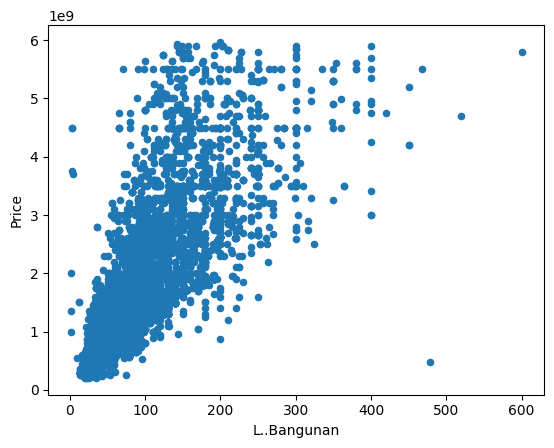

In [12]:
properti.plot.scatter(x = 'L..Bangunan', y = 'Price')
plt.show()

In [14]:
properti[(properti["L..Bangunan"] > 450) & (properti["Price"] <1e9)]

,K..Mandi,K..Tidur,L..Bangunan,Sertifikat,Tipe.Properti,Kota,Price
6206,2,2,478,HGB - Hak Guna Bangunan,Apartemen,Jakarta Barat,480000000


* **Kesimpulan dari plot:**

> Luas bangunan dan Price memiliki korelasi kuat (0.78)

Berdasarkan kesimpulan dan analisis yang sudah dilakukan, adakah yang perlu kita lakukan pada data kita?

- Buang data yang salah (index 6206)
- Buang data dengan luas bangunan di bawah **14 $m^2$**

In [20]:
properti[~((properti["L..Bangunan"] > 450) & 
           (properti["Price"] <1e9) | 
           (properti["L..Bangunan"] < 14))]

Index([   0,    1,    2,    3,    4,    5,    6,    7,    8,    9,
       ...
       6277, 6278, 6279, 6280, 6281, 6282, 6283, 6284, 6285, 6286],
      dtype='int64', length=6276)

In [22]:
properti = properti.drop(properti[(properti["L..Bangunan"] > 450) & 
                                  (properti["Price"] < 1e9)].index)
properti = properti.drop(properti[(properti["L..Bangunan"] < 14)].index)

In [23]:
properti.describe()

,K..Mandi,K..Tidur,L..Bangunan,Price
count,"6,276.000","6,276.000","6,276.000","6,276.000"
mean,1.910,2.410,92.945,"1,704,111,376.673"
std,0.948,0.975,65.901,"1,253,527,930.687"
min,1.000,1.000,14.000,"205,000,000.000"
25%,1.000,2.000,42.000,"740,000,000.000"
50%,2.000,2.000,75.000,"1,350,000,000.000"
75%,3.000,3.000,130.000,"2,350,000,000.000"
max,5.000,4.000,600.000,"5,970,000,000.000"


* <u>**Identifikasi Outlier**</u>

Dari hasil analisa statistik deskriptif belum diketahui apakah pada data yang kita miliki memiliki ***outlier*** atau tidak, maka dari itu mari coba kita lihat dengan menggunakan visualisasi ***Box Plot***.

Visualisasi ***Box Plot*** dapat dibuat dengan menggunakan fungsi `boxplot()` dari `library matplotlib`. 

<Axes: >

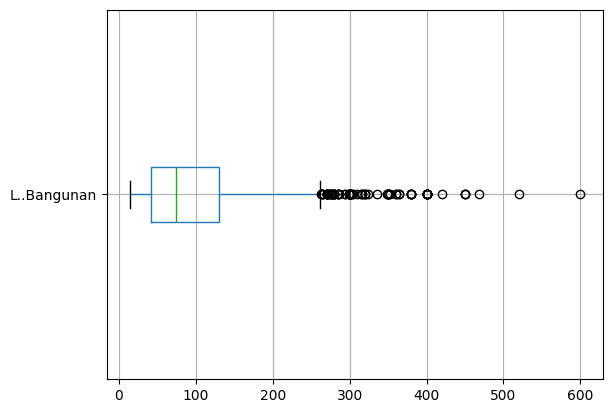

In [25]:
# Melihat nilai outlier
properti.boxplot(column = 'L..Bangunan', vert=False)

### 6. Membuat Model Simple Linear Regression 

#### **6.1 Model dengan outlier** 

Dari tahapan EDA (checking outlier) dengan boxplot, diketahui bahwa variabel `L..Bangunan` memiliki nilai outlier.

Selanjutnya jika kita ingin menjawab business problem yang kita miliki, yaitu kita ingin melakukan prediksi harga **Price** properti berdasarkan besaran **Luas Bangunan**. Kita akan memakai seluruh observasi yang ada terlebih dahulu.

<u>**Tahapan 1 - Menentukan Target dan Prediktor**</u>
   - Y   : `df['target']`
   - X   : `sm.add_constant(df['prediktor'])`. Supaya intercept tidak dianggap 0

In [26]:
# membuat objek untuk prediktor (pilih kolom yang akan digunakan)
X_data = properti["L..Bangunan"]

# menambahkan intercept/add_constant
X_data = sm.add_constant(X_data)

# membuat objek target
Y_data = properti["Price"]

In [ ]:
# X_data["const"] = 1 # sama saja dengan sm.add_constant(X_data)

In [28]:
X_data.head(3)

,const,L..Bangunan
0,1.000,294
1,1.000,78
2,1.000,33


<u> **Tahapan 2 - Membuat model Prediksi**</u>

Untuk membuat model regresi linier di Python kita akan menggunakan fungsi `OLS()` dari package `statsmodels`.

Syntax: `sm.OLS(target, prediktor).fit()`

In [29]:
# Membuat model
lm_outlier = sm.OLS(Y_data, X_data).fit()

<u>**Tahapan 3 - Melihat hasil / menginterpretasikan model** </u>
   - intercept dan slope: `model.params`
   - summary model      : `model.summary()`  

In [30]:
# params
lm_outlier.params

const         303,614,296.475
L..Bangunan    15,068,066.597
dtype: float64

In [31]:
# Summary model
lm_outlier.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.628
Model:                            OLS   Adj. R-squared:                  0.627
Method:                 Least Squares   F-statistic:                 1.057e+04
Date:                Mon, 08 Jan 2024   Prob (F-statistic):               0.00
Time:                        10:11:25   Log-Likelihood:            -1.3728e+05
No. Observations:                6276   AIC:                         2.746e+05
Df Residuals:                    6274   BIC:                         2.746e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const        3.036e+08   1.67e+07     18.182      0.000    2.71e+08    3.36e+08
L..Bangunan  1.507e+07   1.47e+05    102.809      0.000    1.48e+07    1.54e+07
==============================================================================
Omnibus:                     1807.386   Durbin-Watson:                   2.034
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             6246.081
Skew:                           1.431   Prob(JB):                         0.00
Kurtosis:                       6.962   Cond. No.                         197.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

📝 **Interpretasi model :**

1. **Model linier regresi** untuk kasus prediksi harga properti di daerah Jakarta, Depok, dan Tangsel adalah:

> `Price = b0 + b1*L..Bangunan`

> `Price =  3.036e+08 + 1.507e+07 * L..Bangunan`
   - slope    : 1.507e+07
   - intercept: 3.036e+08
   
Interpretasi:

- jika L..Bangunan bernilai 0 maka harga dasar dari properti tersebut adalah 3.036e+08
- jika terdapat kenaikan 1 nilai pada L..Bangunan, harga properti meningkat sebesar 1.507e+07
   
2. **Signifikansi prediktor** (bandingkan nilai p-value dengan alpha)
   - H0: Luas Bangunan tidak mempengaruhi Harga Properti
   - H1: Luas Bangunan mempengaruhi Harga Properti
   
    **Note:** Ketika p-value < 0.05 (alpha) maka kesimpulannya adalah menolak H0 yang berarti Luas Bangunan signifikan berpengaruh terhadap Harga properti

   > p-value : < alpha (0.000)
   
   > Kesimpulan : tolak H0, Luas Bangunan signifikan berpengaruh terhadap Harga properti
   
3. **Goodness of fit** (melihat nilai R-squared, dimana **0 ≤ $R^2$ ≤ 1**)
   
   Nilai R-Squared merepresentasikan % variasi dari data yang berhasil dijelaskan oleh model.
   
   - Semakin mendekati 1, mengindikasikan model semakin fit
   - Semakin mendekati 0, mengindikasikan model tidak fit
   
   > R-Squared: 0.628
   
   > Kesimpulan : Variabel prediktor (L..Bangunan) berhasil menjelaskan 63% variasi dari target data kita (Price). Sisa 37%-nya dijelaskan oleh variabel lain yang tidak dimasukkan ke dalam model.

**[Optional] Other Information in Summary**

1. Tabel 1, sisi kiri menyimpan informasi dasar dari model
    - Dep. Variable   : Target variabel (Y)
    - Model           : Model regresi linier
    - Method          : Metode yang digunakan untuk membuat model regresi linier
    - No. Observations:	Jumlah observasi yang digunakan ketika membuat model regresi linier
    - DF Residuals    :	Degrees of freedom error/residual (**No. Observations - parameter**)
    - DF Model        :	Degrees of freedom model (**jumlah prediktor**)


2. Tabel 1, sisi kanan menyimpan informasi kebaikan model
    - **R-squared**         : Goodness of fit
    - **Adj. R-squared**    : Goodneess of fit untuk multiple linear regression
    - F-statistic       : Statistik hitung dari F-test (uji simultan)
    - Prob (F-statistic): p-value dari F-test 
        
        a. H0 --> Tidak ada prediktor yang berpengaruh signifikan terhadap target
        
        b. H1 --> Min terdapat 1 prediktor yang berpengaruh signifikan terhadap target
    - Log-likelihood    : Log dari nilai likelihood.
    - AIC               : Akaike Information Criterion (information loss)
    - BIC               : Bayesian Information Criterion (serupa dengan AIC, namun perhitungan nilainya berbeda)

3. Tabel 2 menyimpan informasi dari koefisien regresi
    - **coef**              : Estimasi koefisien
    - std err               : Estimasi selisih nilai sampel terhadap populasi
    - t                     : Statistik hitung dari t-test (uji parsial)
    - **P > |t|**               : P-value dari t-test
    - [95.0% Conf. Interval]: Confidence Interval (CI) 95%


4. Tabel 3 menyimpan hasil uji statistik error/residual
    - Omnibus	D’Angostino’s test: Statistik hitung untuk pengujian **Skewness** dan **Kurtosis**
    - Prob(Omnibus): p-value dari **Omnibus	D’Angostino’s test**
    - Skewness: Mengukur kecondongan distribusi error
    - Kurtosis:	Mengukur keruncingan distribusi error
    - Durbin-Watson: Statistik hitung pengujian autokorelasi
    - Jarque-Bera:	Serupa dengan **Omnibus	D’Angostino’s test**, namun memiliki perhitungan yang berbeda
    - Prob (JB): p-value dari **Jarque-Bera**
    - Cond. No: Pengujian multicolinearity

<u> **Tahapan 4 - Hasil Visualisasi 2 Dimensi** </u>
    
- hanya bisa untuk 1 variabel prediktor

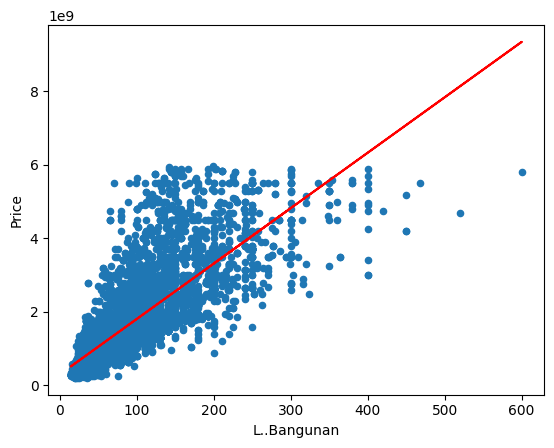

In [32]:
# Plot scatter
properti.plot.scatter(x='L..Bangunan', y='Price')

# Plot garis linear model
plt.plot(properti['L..Bangunan'], lm_outlier.fittedvalues, c='red')
plt.show()

<u>**Tahapan 5 - Melakukan Prediksi Model**</u>

❓🏠 **Business Question**:
Terdapat properti A dengan Luas Bangunan 90m2. Kita diminta untuk memprediksi harga properti A, berapakah harga prediksinya?

In [33]:
## code here (manual)
intercept =  3.036e+08 
slope = 1.507e+07

house_price_new = intercept + slope*90
house_price_new

1659900000.0

Untuk melakukan prediksi terhadap beberapa Luas bangunan, dapat menggunakan `model.predict()`

Eg : Data properti dengan Luas Bangunan terbaru

In [34]:
new_house = pd.DataFrame({'L.B': (75, 320, 188, 60, 90)})
new_house

,L.B
0,75
1,320
2,188
3,60
4,90


In [35]:
## code here
# predict new_house datasest
X_new = sm.add_constant(new_house)

lm_outlier.predict(X_new)

0   1,433,719,291.236
1   5,125,395,607.458
2   3,136,410,816.677
3   1,207,698,292.284
4   1,659,740,290.189
dtype: float64

1659900000.0

#### **6.2 Model tanpa outlier** 

Untuk membuat model tanpa outlier, langkah pertama yang harus dilakukan adalah melakukan filtering pada data. 

❓ Coba tinjau lagi nilai outlier pada data properti kita, kira-kira berapa threshold batas outlier yang dimiliki?

<Axes: >

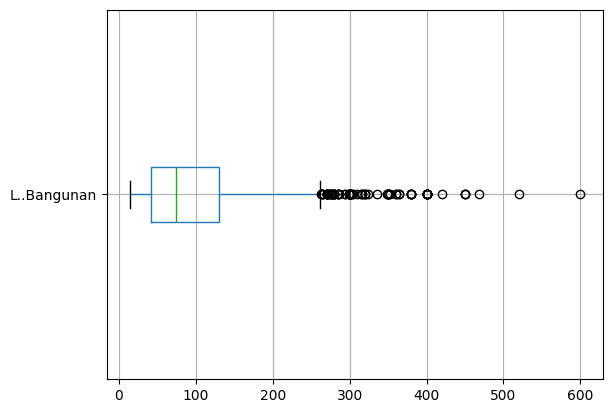

In [37]:
# melihat nilai outlier kembali dengan boxplot
properti.boxplot('L..Bangunan', vert=False)

Dalam kasus ini dikarenakan outlier `L..Bangunan` di atas 280 m2, maka data yang digunakan adalah data dengan `L..Bangunan` < 280 m2.

In [38]:
# remove outlier (membuang nilai outlier dengan L.B < 280m2)
properti_new = properti[(properti['L..Bangunan'] < 280)]
properti_new

,K..Mandi,K..Tidur,L..Bangunan,Sertifikat,Tipe.Properti,Kota,Price
1,3,3,78,SHM - Sertifikat Hak Milik,Apartemen,Jakarta Selatan,2500000000
2,1,1,33,HGB - Hak Guna Bangunan,Apartemen,Jakarta Timur,265000000
3,2,2,120,SHM - Sertifikat Hak Milik,Rumah,Jakarta Pusat,2600000000
4,3,3,130,SHM - Sertifikat Hak Milik,Rumah,Depok,1300000000
5,1,1,97,"Lainnya (PPJB,Girik,Adat,dll)",Apartemen,Jakarta Barat,3200000000
...,...,...,...,...,...,...,...
6282,2,3,80,SHM - Sertifikat Hak Milik,Rumah,Jakarta Timur,960000000
6283,2,3,84,SHM - Sertifikat Hak Milik,Rumah,Depok,1070000000
6284,2,2,132,"Lainnya (PPJB,Girik,Adat,dll)",Apartemen,Jakarta Utara,1900000000
6285,3,3,83,SHM - Sertifikat Hak Milik,Rumah,Depok,1260000000


In [39]:
# melakukan modeling dengan data baru 
# define predictor variable
X_data_no = properti_new["L..Bangunan"]
X_data_no = sm.add_constant(X_data_no)

#define target variable
Y_data_no = properti_new["Price"]

# build model with outlier
lm_no_outlier = sm.OLS(Y_data_no, X_data_no).fit()

lm_no_outlier.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.616
Model:                            OLS   Adj. R-squared:                  0.616
Method:                 Least Squares   F-statistic:                     9908.
Date:                Mon, 08 Jan 2024   Prob (F-statistic):               0.00
Time:                        10:57:21   Log-Likelihood:            -1.3502e+05
No. Observations:                6179   AIC:                         2.700e+05
Df Residuals:                    6177   BIC:                         2.701e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const        2.151e+08   1.73e+07     12.399      0.000    1.81e+08    2.49e+08
L..Bangunan  1.621e+07   1.63e+05     99.541      0.000    1.59e+07    1.65e+07
==============================================================================
Omnibus:                     1816.482   Durbin-Watson:                   2.038
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             5911.901
Skew:                           1.487   Prob(JB):                         0.00
Kurtosis:                       6.758   Cond. No.                         194.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

📝 **Interpretasi model:**

1. **Model linier regresi** untuk kasus prediksi harga properti di daerah Jakarta, Depok, dan Tangsel adalah:
   > `Price = b0 + b1*L..Bangunan`
   
   > `Price =  2.151e+08 + 1.621e+07*L..Bangunan`
   
   - slope    : setiap kenaikan 1 luas bangunan meningkatkan harga properti sebesar 1.621e+07
   - intercept: ketika luas bangunan bernilai 0 maka harga properti 2.151e+08
   
2. **Signifikansi prediktor** (bandingkan nilai p-value dengan alpha)
    - H0: Luas Bangunan tidak mempengaruhi Harga Properti
    - H1: Luas Bangunan mempengaruhi Harga Properti
    
    **Note:** Ketika p-value < 0.05 (alpha) maka kesimpulannya adalah menolak H0
    
    > p-value : 0.000 (L.Bangunan)
    
    > Kesimpulan : tolak h0 -> Luas Bangunan mempengaruhi Harga Properti
   
3. **Goodness of fit** (melihat nilai R-squared, dimana **0 ≤ $R^2$ ≤ 1**)
   
   Nilai R-Squared merepresentasikan % variasi dari data yang berhasil dijelaskan oleh model. **Formula**:  
      
   $R^2=1- \frac {∑ \limits_{i=1}^n (Y_i−\hat Y)^2}{∑ \limits_{i=1}^n(Y_i−\bar Y)^2}$
   
   - Semakin mendekati 1, mengindikasikan model semakin fit
   - Semakin mendekati 0, mengindikasikan model tidak fit
   
   > R-Squared: 0.616
   
   > Kesimpulan : Variabel prediktor (L..Bangunan) berhasil menjelaskan 61.6% variasi dari target data kita (Price). Sisa 38.4%-nya dijelaskan oleh variabel lain yang tidak dimasukkan ke dalam model.

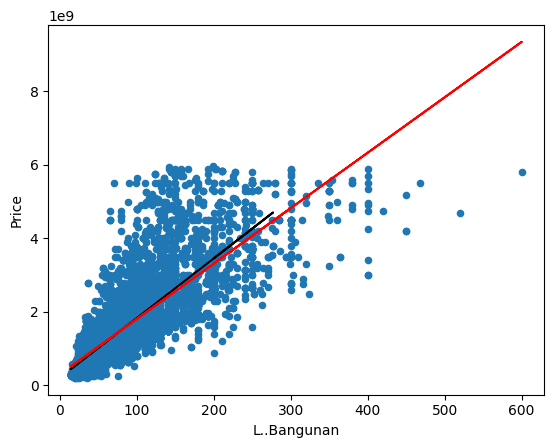

In [40]:
# visualize the result
properti.plot.scatter(x='L..Bangunan', y='Price')
# visualisasi model no_outlier
plt.plot(properti_new['L..Bangunan'], lm_no_outlier.fittedvalues, c='black')
# visualisasi model dengan outlier
plt.plot(properti['L..Bangunan'], lm_outlier.fittedvalues, c='red')
plt.show()

## **Leverage vs. Influence**

**Leverage** adalah nilai yang letaknya jauh dari letak observasi lainnya, sering disebut sebagai **outlier**. Nilai leverage dapat mempengaruhi model linier regresi atau pun tidak.

- Ketika **leverage mempengaruhi (menurunkan R-Squared)** model linier regresi: **high influence**, sebaiknya **di-exclude** -> membuat model menjadi lebih jelek
- Ketika **leverage tidak mempengaruhi (meningkatkan R-Squared)** model linier regresi: **low influence**, sebaiknya **di-include** -> membuat model menjadi lebih baik

In [41]:
print("R-Squared model dengan outlier :", (lm_outlier.rsquared).round(2))
print("R-Squared model tanpa outlier :", (lm_no_outlier.rsquared).round(2))

R-Squared model dengan outlier : 0.63
R-Squared model tanpa outlier : 0.62


**Kesimpulan**: Model dengan outliers lebih baik merepresentasikan data kita.

## Multiple Linear Regression

Linear regression dengan **lebih dari satu prediktor** bisa meningkatkan performa model karena lebih banyak informasi yang dapat menjelaskan target.

Formula multiple linear regression:

$$
\hat{y}=\beta_0+\beta_1.x_1+...+\beta_n.x_n
$$

dimana $\hat{y}$ merupakan prediksi target variabel dan $x_1,...,x_n$ prediktor lainnya. 

Workflow pada simple linear regression dan multiple linear regression adalah sama. Berikut merupakan worklownya:

### 1. Preparation Data

Kita akan membuat multiple linear regression menggunakan data properti untuk memprediksi `Price` berdasarkan keseluruhan variabel.
- y: Price
- x: K..Mandi, K..Tidur, L..Bangunan, Sertifikat, Tipe.Properti, dan Kota

In [42]:
properti.head()

,K..Mandi,K..Tidur,L..Bangunan,Sertifikat,Tipe.Properti,Kota,Price
0,3,4,294,SHM - Sertifikat Hak Milik,Rumah,Jakarta Utara,3500000000
1,3,3,78,SHM - Sertifikat Hak Milik,Apartemen,Jakarta Selatan,2500000000
2,1,1,33,HGB - Hak Guna Bangunan,Apartemen,Jakarta Timur,265000000
3,2,2,120,SHM - Sertifikat Hak Milik,Rumah,Jakarta Pusat,2600000000
4,3,3,130,SHM - Sertifikat Hak Milik,Rumah,Depok,1300000000


#### 💡 Categorical Predictor: Dummy Variable Encoding

Di Python, data input dan output untuk model *machine learning* harus berbentuk numeric. Ini berarti, ketika data kita mempunyai nilai kategorikal, harus di-*encode* menjadi numerik terlebih dahulu.

Sebelum melakukan fitting model, kita harus mengubah **prediktor kategorik menjadi dummy variable**, dengan cara:

- Dilakukan dengan menggunakan fungsi `pd.get_dummies()`
- **One hot encoding** = mengubah kolom kategorik menjadi kolom-kolom baru dari setiap kategori yang berisi nilai 0 dan 1 
- **Dummy variable** =  mengubah kolom kategorik menjadi kolom-kolom baru yang terdiri dari **k-1 kategori**, berisi nilai 0 dan 1. Kategori yang tidak menjadi kolom, akan menjadi kondisi basis. Untuk membuat dummy variable, tambahkan parameter `drop_first=True`

![](assets/one_hot-dummy.png)

📌 Dalam kasus regresi wajib memakai dummy variabel. 

**💡 NOTES**: Salah satu kolom di-*drop* karena bersifat redundan (berulang). Untuk kolom yang hanya memiliki 2 kategori, tidak ada perbedaan hasil/efek baik ketika memilih ordinal ataupun dummy, akan tetapi best practicenya menggunakan dummy variabel.

Mari kita coba menerapkan **Dummy Variable Encoding** untuk kolom-kolom kategorikal.

In [43]:
properti.head()

,K..Mandi,K..Tidur,L..Bangunan,Sertifikat,Tipe.Properti,Kota,Price
0,3,4,294,SHM - Sertifikat Hak Milik,Rumah,Jakarta Utara,3500000000
1,3,3,78,SHM - Sertifikat Hak Milik,Apartemen,Jakarta Selatan,2500000000
2,1,1,33,HGB - Hak Guna Bangunan,Apartemen,Jakarta Timur,265000000
3,2,2,120,SHM - Sertifikat Hak Milik,Rumah,Jakarta Pusat,2600000000
4,3,3,130,SHM - Sertifikat Hak Milik,Rumah,Depok,1300000000


In [45]:
properti.select_dtypes("category").columns.to_list()

['Sertifikat', 'Tipe.Properti', 'Kota']

In [50]:
# Object nama kolom kategori
cat_dummy = ["Sertifikat", "Tipe.Properti", "Kota"]
# cat_dummy = properti.select_dtypes("category").columns

# dummy encoding
properti_enc = pd.get_dummies(data = properti,
                             columns = cat_dummy,
                             drop_first = True,
                             dtype = "int64")

# melihat hasil encoding
properti_enc.head(3)

,K..Mandi,K..Tidur,L..Bangunan,Price,Sertifikat_HP - Hak Pakai,Sertifikat_HS - Hak Sewa,"Sertifikat_Lainnya (PPJB,Girik,Adat,dll)",Sertifikat_PPJB,Sertifikat_SHM - Sertifikat Hak Milik,Tipe.Properti_Rumah,Kota_Jakarta Barat,Kota_Jakarta Pusat,Kota_Jakarta Selatan,Kota_Jakarta Timur,Kota_Jakarta Utara,Kota_Tangerang Selatan
0,3,4,294,3500000000,0,0,0,0,1,1,0,0,0,0,1,0
1,3,3,78,2500000000,0,0,0,0,1,0,0,0,1,0,0,0
2,1,1,33,265000000,0,0,0,0,0,0,0,0,0,1,0,0


In [48]:
properti["Sertifikat"].cat.categories

Index(['HGB - Hak Guna Bangunan', 'HP - Hak Pakai', 'HS - Hak Sewa',
       'Lainnya (PPJB,Girik,Adat,dll)', 'PPJB', 'SHM - Sertifikat Hak Milik'],
      dtype='object')

Pak Candra: Jika hasil dummy dalam bentuk boolean tidak bisa masuk ke model.

In [51]:
properti_bool = pd.get_dummies(data = properti,
                             columns = cat_dummy,
                             drop_first = True,)

### 2. Membuat Model Multiple Linear Regression

In [54]:
# # membuat objek prediktor dan target
# Y = properti_bool["Price"]
# X = sm.add_constant(properti_bool.drop(columns=["Price"]))

# # Membuat model
# lm_bool =sm.OLS(Y, X).fit()

# # Melihat summary
# lm_bool.summary()

In [52]:
# membuat objek prediktor dan target
Y = properti_enc["Price"]
X = sm.add_constant(properti_enc.drop(columns=["Price"]))

# Membuat model
lm_multiple = sm.OLS(Y, X).fit()

# Melihat summary
lm_multiple.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.691
Model:                            OLS   Adj. R-squared:                  0.690
Method:                 Least Squares   F-statistic:                     934.1
Date:                Mon, 08 Jan 2024   Prob (F-statistic):               0.00
Time:                        13:00:36   Log-Likelihood:            -1.3669e+05
No. Observations:                6276   AIC:                         2.734e+05
Df Residuals:                    6260   BIC:                         2.735e+05
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
============================================================================================================
                                               coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------
const                                    -6.805e+07   4.05e+07     -1.680      0.093   -1.47e+08    1.14e+07
K..Mandi                                  8.037e+07    1.8e+07      4.457      0.000     4.5e+07    1.16e+08
K..Tidur                                   8.87e+07   1.67e+07      5.313      0.000     5.6e+07    1.21e+08
L..Bangunan                               1.417e+07   2.28e+05     62.107      0.000    1.37e+07    1.46e+07
Sertifikat_HP - Hak Pakai                -1.917e+08   1.23e+08     -1.564      0.118   -4.32e+08    4.86e+07
Sertifikat_HS - Hak Sewa                 -2.992e+08   3.13e+08     -0.956      0.339   -9.13e+08    3.15e+08
Sertifikat_Lainnya (PPJB,Girik,Adat,dll)  2.888e+07   3.11e+07      0.929      0.353    -3.2e+07    8.98e+07
Sertifikat_PPJB                          -1.797e+08   4.94e+08     -0.364      0.716   -1.15e+09    7.89e+08
Sertifikat_SHM - Sertifikat Hak Milik    -7.895e+07   3.02e+07     -2.616      0.009   -1.38e+08   -1.98e+07
Tipe.Properti_Rumah                      -3.403e+08   3.01e+07    -11.307      0.000   -3.99e+08   -2.81e+08
Kota_Jakarta Barat                        3.911e+08   3.24e+07     12.072      0.000    3.28e+08    4.55e+08
Kota_Jakarta Pusat                        5.054e+08   3.78e+07     13.385      0.000    4.31e+08    5.79e+08
Kota_Jakarta Selatan                      7.807e+08   3.74e+07     20.891      0.000    7.07e+08    8.54e+08
Kota_Jakarta Timur                       -8.513e+06   3.05e+07     -0.279      0.780   -6.83e+07    5.13e+07
Kota_Jakarta Utara                         3.45e+08   3.72e+07      9.287      0.000    2.72e+08    4.18e+08
Kota_Tangerang Selatan                    2.589e+08   3.21e+07      8.061      0.000    1.96e+08    3.22e+08
==============================================================================
Omnibus:                     1458.887   Durbin-Watson:                   2.052
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             5120.034
Skew:                           1.143   Prob(JB):                         0.00
Kurtosis:                       6.789   Cond. No.                     6.40e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.4e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### 3. Interpretasi Model Multiple Linear Regression

**[Contoh Interpretasi Variabel Kategorik]**

- Terdapat category golongan darah A, AB, B, dan O
- Cara menginterpretasikan model apabila memiliki lebih dari 2 kategori :

> y = b0 + 1.96* gol.darahAB + 0.97* gol.darahB + 1.39* gol.darahO

     - slope gol.darahAB = 1.96, nilai y ketika golongan darah nya adalah AB sebesar **b0 + 1.96**
     - slope gol.darahB = 0.97, nilai y ketika golongan darah nya adalah B sebesar **b0 + 0.97**
     - slope gol.darahO = 1.39, nilai y ketika golongan darah nya adalah O sebesar **b0 + 1.39**
     - nilai y ketika golongan darah nya adalah A sebesar **b0 saja** (b0 + est. gol.darahAB * 0 + est. gol.darahB * 0 + est. gol.darahO * 0)
     - Golongan darah AB meningkatkan nilai y sebesar 1.96 poin dibandingkan golongan darah A (Basis)

In [55]:
lm_multiple.params

const                                       -68,046,193.387
K..Mandi                                     80,369,440.910
K..Tidur                                     88,704,257.583
L..Bangunan                                  14,172,990.715
Sertifikat_HP - Hak Pakai                  -191,668,410.368
Sertifikat_HS - Hak Sewa                   -299,168,643.727
Sertifikat_Lainnya (PPJB,Girik,Adat,dll)     28,879,971.583
Sertifikat_PPJB                            -179,723,373.918
Sertifikat_SHM - Sertifikat Hak Milik       -78,951,929.200
Tipe.Properti_Rumah                        -340,252,862.068
Kota_Jakarta Barat                          391,095,409.104
Kota_Jakarta Pusat                          505,410,922.104
Kota_Jakarta Selatan                        780,736,333.606
Kota_Jakarta Timur                           -8,512,539.802
Kota_Jakarta Utara                          345,049,019.597
Kota_Tangerang Selatan                      258,934,983.035
dtype: float64

In [ ]:
l

📝 **Interpretasi model:**

**1. Interpretasi masing-masing variabel** 

contoh:
   - `K..Tidur`: setiap kenaikan jumlah 1 kamar tidur meningkatkan nilai properti sebesar 80.3 juta rupiah.
   - `L..Bangunan`: setiap kenaikan 1 $m^2$ luas bangunan meningkatkan nilai properti sebesar 14.2 juta rupiah.
   - `Sertifikat_HS - Hak Milik`: jika tipe sertifikat adalah SHM maka nilai properti berkurang sebesar 78.9 juta dibandingkan dengan tipe sertifikat HGB.
   - `Kota_Jakarta Selatan`: jika lokasi properti berada di Jakarta Selatan maka nilai properti bertambah 780 juta dibandingkan jika lokasinya di Depok.
   
**2. Signifikansi prediktor**
   - variabel signifikan (p-value <= 0.05) : seluruh variabel signifikan
   - variabel tidak signifikan (p-value > 0.05) : tidak ada

note: untuk prediktor kategorik, dianggap signifikan mempengaruhi target jika salah satu kategori signifikan

### 4. Prediksi

Setelah model terbentuk, model tidak dapat langsung digunakan sebelum melewati tahap evaluasi.

Tahapan evaluasi dapat dilakukan dengan melakukan **prediksi** terhadap data yang ada. Prediksi model dapat dilakukan dengan memanfaatkan fungsi `predict()`, berikut syntax yang dapat digunakan:

> `nama_model.predict(data_prediktor)`

In [58]:
properti.head(2)

,K..Mandi,K..Tidur,L..Bangunan,Sertifikat,Tipe.Properti,Kota,Price
0,3,4,294,SHM - Sertifikat Hak Milik,Rumah,Jakarta Utara,3500000000
1,3,3,78,SHM - Sertifikat Hak Milik,Apartemen,Jakarta Selatan,2500000000


In [59]:
properti.Sertifikat.unique()

['SHM - Sertifikat Hak Milik', 'HGB - Hak Guna Bangunan', 'Lainnya (PPJB,Girik,Adat,dll)', 'HP - Hak Pakai', 'HS - Hak Sewa', 'PPJB']
Categories (6, object): ['HGB - Hak Guna Bangunan', 'HP - Hak Pakai', 'HS - Hak Sewa', 'Lainnya (PPJB,Girik,Adat,dll)', 'PPJB', 'SHM - Sertifikat Hak Milik']

In [60]:
X_predict = pd.DataFrame({"K..Mandi": [1, 2, 3],
                         "K..Tidur": [2, 4, 5],
                         "L..Bangunan": [123, 321, 531],
                         "Sertifikat": ["SHM - Sertifikat Hak Milik", "PPJB", "HGB - Hak Guna Bangunan"],
                         "Tipe.Properti": ["Apartemen", "Rumah", "Rumah"],
                         "Kota": ["Depok", "Jakarta Selatan", "Jakarta Pusat"]})

X_predict.head()

,K..Mandi,K..Tidur,L..Bangunan,Sertifikat,Tipe.Properti,Kota
0,1,2,123,SHM - Sertifikat Hak Milik,Apartemen,Depok
1,2,4,321,PPJB,Rumah,Jakarta Selatan
2,3,5,531,HGB - Hak Guna Bangunan,Rumah,Jakarta Pusat


In [76]:
X_predict_enc = pd.get_dummies(data = X_predict,
                              columns= cat_var, # kolom tipe kategori
                              dtype = "int64",
                              drop_first = True)
X_predict_enc

,K..Mandi,K..Tidur,L..Bangunan,Sertifikat_PPJB,Sertifikat_SHM - Sertifikat Hak Milik,Tipe.Properti_Rumah,Kota_Jakarta Pusat,Kota_Jakarta Selatan
0,1,2,123,0,1,0,0,0
1,2,4,321,1,0,1,0,1
2,3,5,531,0,0,1,1,0


In [78]:
X_predict_enc = X_predict_enc.reindex(columns = X.columns, fill_value = 0)

In [79]:
# membuat kolom prediksi yang berisi hasil dari prediksi model
X_predict_enc['Prediksi'] = lm_multiple.predict(X_predict_enc)
X_predict_enc.head()

,const,K..Mandi,K..Tidur,L..Bangunan,Sertifikat_HP - Hak Pakai,Sertifikat_HS - Hak Sewa,"Sertifikat_Lainnya (PPJB,Girik,Adat,dll)",Sertifikat_PPJB,Sertifikat_SHM - Sertifikat Hak Milik,Tipe.Properti_Rumah,Kota_Jakarta Barat,Kota_Jakarta Pusat,Kota_Jakarta Selatan,Kota_Jakarta Timur,Kota_Jakarta Utara,Kota_Tangerang Selatan,Prediksi
0,0,1,2,123,0,0,0,0,1,0,0,0,0,0,0,0,"1,922,103,884.819"
1,0,2,4,321,0,0,0,1,0,1,0,0,1,0,0,0,"5,325,846,029.281"
2,0,3,5,531,0,0,0,0,0,1,0,1,0,0,0,0,"8,375,645,740.335"


### 5. Goodness of Fit: R-Squared vs. Adj. R-Squared

Perbedaan R-Squared dan Adj. R-Squared:

- **R-Squared**: Seberapa baik model menjelaskan data, dengan mengukur seberapa besar informasi (variansi) dari target dapat dijelaskan oleh prediktor. Sehingga, jelas ketika **prediktor bertambah**, informasi (variansi) yang dirangkum semakin banyak atau dengan kata lain jelas nilai **R-Squared akan meningkat**.

    > Syntax: `nama_model.rsquared`

- **Adj. R- Squared**: tidak demikian pada adj. r-squred, karena disesuaikan dengan jumlah prediktor yang digunakan. Adj. r-squared akan meningkat hanya jika prediktor baru yang ditambahkan mengarah pada hasil prediksi yang lebih baik (prediktor signifikan mempengaruhi target)

    > Syntax: `nama_model.rsquared_adj`
   
Mari kita bandingan nilai R-Squared dan Adj. R-Squared antara `lm_outlier` dengan `lm_multiple`!

In [80]:
# R-Squared
print('R-Squared Simple Linear Regression :', (lm_outlier.rsquared))
print('R-Squared Simple Linear Regression :', (lm_multiple.rsquared))

R-Squared Simple Linear Regression : 0.62751630876373
R-Squared Simple Linear Regression : 0.6911833941775698


In [81]:
# Adj R-Squared
print('Adj R-Squared Simple Linear Regression :', (lm_outlier.rsquared_adj))
print('Adj R-Squared Simple Linear Regression :', (lm_multiple.rsquared_adj))

Adj R-Squared Simple Linear Regression : 0.6274569393516745
Adj R-Squared Simple Linear Regression : 0.6904434182850241


📝 **Kesimpulan**: Berdasarkan nilai R-Squared dan Adj R-Squared, maka model yang terbaik adalah model `lm_multiple`

### Model Evaluation : Nilai Error

Untuk melihat apakah prediksi yang dibuat menghasilkan nilai error terkecil
  
**Error/residual adalah selisih antara hasil prediksi dengan nilai aktual.**

$$
Error/residual = actual - prediction = y - \hat y
$$

Terdapat beberapa nilai error yang ada :

1. MAE (Mean Absolute Error): Memperlakukan error dengan lebih ringan. **Formula:**
   $$
   MAE = \frac{1}{N} \sum_{i=1}^{N} \left | y_{i} - \hat{y} \right |
   $$

1. RMSE (Root Mean Square Error): Memperlakukan error dengan lebih sensitif. Ketika nilai error besar, maka nilai RMSE akan semakin besar dan sebaliknya. **Formula:**
   $$
   RMSE = \sqrt{\frac{1}{N} \sum_{i=1}^{N} (y_{i} - \hat{y})^{2}}
   $$
     
1. MAPE (Mean Absolute Percentage Error): Menunjukan seberapa besar penyimpangan error dalam bentuk persentase
   $$
   MAPE = \frac{1}{N} \sum_{i=1}^{N} \frac {\left | y_{i} - \hat{y} \right |} {y}
   $$
   
RMSE digunakan ketika model yang dibuat memuat observasi outlier. Sedangkan, MAE digunakan ketika model yang dibuat tidak memuat observasi outlier. MAPE adalah metrik yang baik untuk interpretasi karena mudah dipahami.

In [84]:
X.head(2)

,const,K..Mandi,K..Tidur,L..Bangunan,Sertifikat_HP - Hak Pakai,Sertifikat_HS - Hak Sewa,"Sertifikat_Lainnya (PPJB,Girik,Adat,dll)",Sertifikat_PPJB,Sertifikat_SHM - Sertifikat Hak Milik,Tipe.Properti_Rumah,Kota_Jakarta Barat,Kota_Jakarta Pusat,Kota_Jakarta Selatan,Kota_Jakarta Timur,Kota_Jakarta Utara,Kota_Tangerang Selatan
0,1.000,3,4,294,False,False,False,False,True,True,False,False,False,False,True,False
1,1.000,3,3,78,False,False,False,False,True,False,False,False,True,False,False,False


In [83]:
properti['Prediksi'] = lm_multiple.predict(X)
properti.head(3)

,K..Mandi,K..Tidur,L..Bangunan,Sertifikat,Tipe.Properti,Kota,Price,Prediksi
0,3,4,294,SHM - Sertifikat Hak Milik,Rumah,Jakarta Utara,3500000000,"4,620,582,658.209"
1,3,3,78,SHM - Sertifikat Hak Milik,Apartemen,Jakarta Selatan,2500000000,"2,246,452,582.268"
2,1,1,33,HGB - Hak Guna Bangunan,Apartemen,Jakarta Timur,265000000,"560,223,658.899"


**MAE**

Fungsi `meanabs(kolom_target, kolom_prediksi)`

In [85]:
# code here
from statsmodels.tools.eval_measures import meanabs
meanabs(properti["Price"], properti["Prediksi"])

481478265.53622806

In [86]:
properti["Price"].describe()

count           6,276.000
mean    1,704,111,376.673
std     1,253,527,930.687
min       205,000,000.000
25%       740,000,000.000
50%     1,350,000,000.000
75%     2,350,000,000.000
max     5,970,000,000.000
Name: Price, dtype: float64

**RMSE**

Fungsi `rmse(kolom_target, kolom_prediksi)`

In [87]:
# code here
from statsmodels.tools.eval_measures import rmse
rmse(properti["Price"], properti["Prediksi"])

696545892.4274085

**MAPE**

Fungsi `mean_absolute_percentage_error()`

Pada fungsi tersebut nantinya akan kita isi dengan parameter yaitu 

- `y_true` = Parameter ini akan diisi dengan kolom target
- `y_pred` = Parameter ini akan diisi dengan kolom hasil prediksi

In [88]:
# code here
from sklearn.metrics import mean_absolute_percentage_error
mean_absolute_percentage_error(y_true = properti["Price"], y_pred = properti["Prediksi"])

0.37549002680959476

# Assumption Checking

Limitasi dari pemodelan linear regresi adalah terdapat beberapa asumsi yang perlu dipenuhi agar model linear regresi dikatakan model yang baik. 
Pendekatan Ordinary Least Square/Linear Regression dikatakan BLUE (Best Linear Unbiased Estimator) ketika memenuhi beberapa uji asumsi berikut:
1. **Linearity**: antara x dan y nya ada hubungan linear  
    - Bisa dilihat dari R-squared model, jika R-squared kecil, maka kemungkinan antara prediktor dan target, tidak ada hubungan linear
2. **Normality of Residual**: Residual nya berdistribusi normal 
    - Saat berdistribusi normal, error berada di sekitar 0
3. **No-Heteroscedasticity**: Variansi residual konstan (tidak membentuk sebuah pola)  
4. **Little to No-Multicollinearity**: antar variabel prediktor nya harus independence (tidak mempunyai hubungan)  


## Linearity

Untuk menguji apakah variabel target dan prediktor memiliki hubungan linear. Dapat dilihat dengan nilai korelasi. 

Linearity artinya target variabel dengan prediktornya memiliki hubungan yang linear atau hubungannya bersifat garis lurus. Selain itu, efek atau nilai koefisien antar variabel bersifat additive. Jika linearity ini tidak terpenuhi, maka otomatis semua nilai koefisien yang kita dapatkan tidak valid karena model berasumsi bahwa pola yang akan kita buat adalah linear.

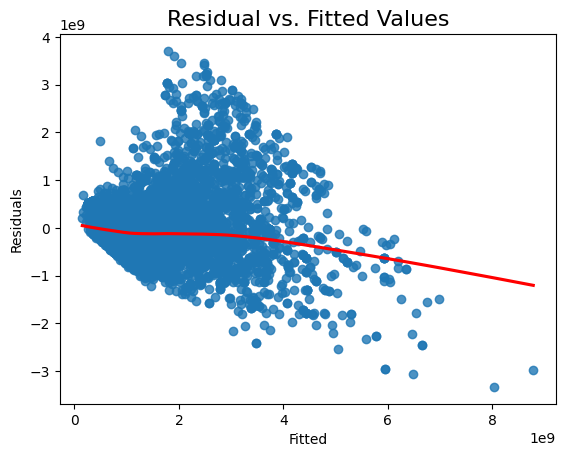

In [89]:
# Residual vs fitted values
linearity_test(lm_multiple)

Bagaimana apabila ada yang tidak linear?
- Exclude variable tersebut dari model
- Apabila mayoritas variable prediktor tidak linear, maka bisa ganti model

## Normality of Residual

**Harapannya ketika membuat model linear regression**, error yang dihasilkan berdistribusi normal. Artinya error banyak berkumpul disekitar angka 0. Untuk mengecek residual menyebar normal, pengujian yang paling sering dilakukan adalah Shapiro test:
- $H_0$: Residual berdistribusi normal
- $H_1$: Residual tidak berdistribusi normal

Dalam melakukan pengujiannya kita akan dibantu library `scipy` dan memanfaatkan fungsi `shapiro()`. Untuk memanfaatkan fungsi tersebut, kita akan mengeluarkan nilai residu dari model yang sudah dibuat dengan menambahkan `.resid` pada objek model yang dibuat.

📌 **Note**: Jika asumsi normalitas tidak terpenuhi, maka hasil uji signifikansi serta nilai standard error dari intercept dan slope setiap prediktor yang dihasilkan bersifat bias atau tidak mencerminkan nilai sebenarnya. Jika residual memiliki distribusi yang tidak normal, bisa lakukan **transformasi/scaling data pada target variabel** atau **menambahkan sample data**.

In [90]:
pd.DataFrame({
    'Prediction': lm_multiple.fittedvalues,
    'Actual': properti_enc['Price'],
    'Residual': lm_multiple.resid
}).head()

,Prediction,Actual,Residual
0,"4,620,582,658.209",3500000000,"-1,120,582,658.209"
1,"2,246,452,582.268",2500000000,"253,547,417.732"
2,"560,223,658.899",265000000,"-295,223,658.899"
3,"2,057,066,220.233",2600000000,"542,933,779.767"
4,"1,862,458,903.773",1300000000,"-562,458,903.773"


Untuk melakukan pengujian asumsi normality of residual bisa menggunakan visualisasi histogram.

<Axes: >

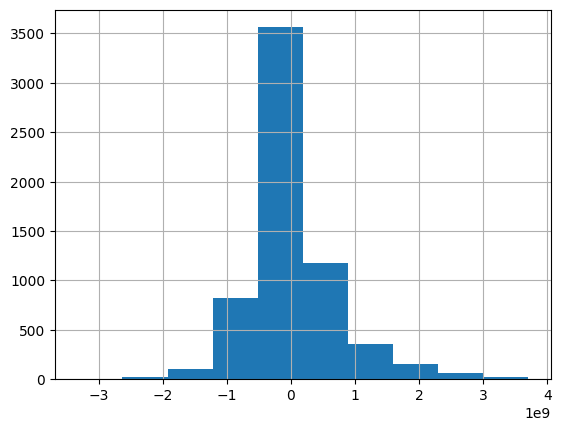

In [91]:
lm_multiple.resid.hist()

Selain itu bisa juga menggunakan pengujian statistik yaitu **Shapiro Test**. Dalam melakukan pengujiannya kita akan dibantu library `scipy` dan memanfaatkan fungsi `shapiro()`. Untuk memanfaatkan fungsi tersebut, kita akan mengeluarkan nilai residu dari model yang sudah dibuat dengan menambahkan `.resid` pada objek model yang dibuat.

In [92]:
from scipy.stats import shapiro
shapiro(lm_multiple.resid)

C:\Users\ALGORITMA\miniconda3\envs\dev\lib\site-packages\scipy\stats\_morestats.py:1882: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


ShapiroResult(statistic=0.9078583717346191, pvalue=0.0)

- $H_0$: Residual berdistribusi normal
- $H_1$: Residual tidak berdistribusi normal

Nilai p-value yang kita harapkan pada uji shapiro test yaitu **p-value > alpha**.

Kesimpulan: Residual tidak berdistribusi normal.

Handling asumsi yang tidak terpenuhi untuk normality of residuals yaitu dengan cara:
- menambahkan data
- transformasi pada target varibel (y)

In [93]:
lm_multiple.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.691
Model:                            OLS   Adj. R-squared:                  0.690
Method:                 Least Squares   F-statistic:                     934.1
Date:                Mon, 08 Jan 2024   Prob (F-statistic):               0.00
Time:                        14:57:20   Log-Likelihood:            -1.3669e+05
No. Observations:                6276   AIC:                         2.734e+05
Df Residuals:                    6260   BIC:                         2.735e+05
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
============================================================================================================
                                               coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------
const                                    -6.805e+07   4.05e+07     -1.680      0.093   -1.47e+08    1.14e+07
K..Mandi                                  8.037e+07    1.8e+07      4.457      0.000     4.5e+07    1.16e+08
K..Tidur                                   8.87e+07   1.67e+07      5.313      0.000     5.6e+07    1.21e+08
L..Bangunan                               1.417e+07   2.28e+05     62.107      0.000    1.37e+07    1.46e+07
Sertifikat_HP - Hak Pakai                -1.917e+08   1.23e+08     -1.564      0.118   -4.32e+08    4.86e+07
Sertifikat_HS - Hak Sewa                 -2.992e+08   3.13e+08     -0.956      0.339   -9.13e+08    3.15e+08
Sertifikat_Lainnya (PPJB,Girik,Adat,dll)  2.888e+07   3.11e+07      0.929      0.353    -3.2e+07    8.98e+07
Sertifikat_PPJB                          -1.797e+08   4.94e+08     -0.364      0.716   -1.15e+09    7.89e+08
Sertifikat_SHM - Sertifikat Hak Milik    -7.895e+07   3.02e+07     -2.616      0.009   -1.38e+08   -1.98e+07
Tipe.Properti_Rumah                      -3.403e+08   3.01e+07    -11.307      0.000   -3.99e+08   -2.81e+08
Kota_Jakarta Barat                        3.911e+08   3.24e+07     12.072      0.000    3.28e+08    4.55e+08
Kota_Jakarta Pusat                        5.054e+08   3.78e+07     13.385      0.000    4.31e+08    5.79e+08
Kota_Jakarta Selatan                      7.807e+08   3.74e+07     20.891      0.000    7.07e+08    8.54e+08
Kota_Jakarta Timur                       -8.513e+06   3.05e+07     -0.279      0.780   -6.83e+07    5.13e+07
Kota_Jakarta Utara                         3.45e+08   3.72e+07      9.287      0.000    2.72e+08    4.18e+08
Kota_Tangerang Selatan                    2.589e+08   3.21e+07      8.061      0.000    1.96e+08    3.22e+08
==============================================================================
Omnibus:                     1458.887   Durbin-Watson:                   2.052
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             5120.034
Skew:                           1.143   Prob(JB):                         0.00
Kurtosis:                       6.789   Cond. No.                     6.40e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.4e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

## No Heteroscedasticity (Homoscedasticity)

Homocesdasticity menunjukkan bahwa residual atau error bersifat konstan atau tidak membentuk pola tertentu. Jika error membentuk pola tertentu seperti garis linear atau mengerucut, maka kita sebut dengan `Heterocesdasticity` dan akan berpengaruh pada nilai standard error pada estimate/koefisien prediktor yan bias (terlalu sempit atau terlalu lebar).

Untuk mengecek terjadinya heteroscedasticity kita dapat menggunakan Breusch-Pagan test:
- $H_0$: residual homogen(tidak membentuk sebuah pola/acak)
- $H_1$: residual heteros (membentuk sebuah pola)

Kita bisa menggunakan method `het_breuschpagan()` dari library `statsmodels`.

Pada `lm_multiple_new` yang kita miliki, kita bisa memvisualisasikan sebaran dari residual yang ada dengan menggunakan scatter plot.

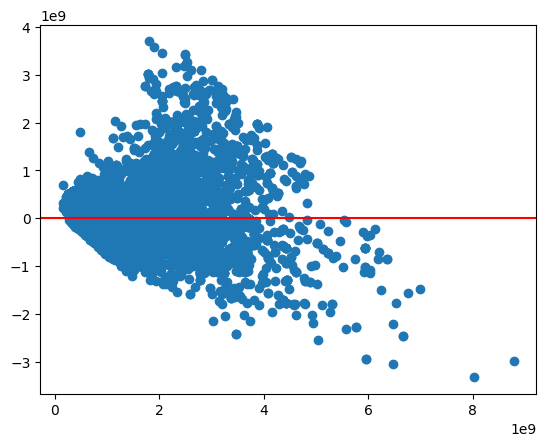

In [94]:
plt.scatter(y = lm_multiple.resid, x = lm_multiple.fittedvalues)
plt.axhline(y = 0, color = 'r')

In [95]:
from statsmodels.compat import lzip
import statsmodels.stats.api as sms

name = ['Lagrange multiplier statistics', 'p-value', 'f-value', 'f p-value']

test = sms.het_breuschpagan(lm_multiple.resid, lm_multiple.model.exog)
lzip(name, test)

[('Lagrange multiplier statistics', 985.8090677322991),
 ('p-value', 1.4820389736368802e-200),
 ('f-value', 77.76864569434171),
 ('f p-value', 8.904001346995089e-219)]

- $H_0$: residual homogen(tidak membentuk sebuah pola/acak)
- $H_1$: residual heteros (membentuk sebuah pola)

p-value kita < 0.05 tolak H0 --> residual heteros (membentuk sebuah pola)

## No Multicolinearity

Harapannya pada model linear regression, tidak terjadi multikolinearitas. Multikolinearitas terjadi ketika antar variabel prediktor yang digunakan pada model memiliki hubungan yang kuat. Ada atau tidak multikolinearitas dapat dilihat dari nilai VIF(Variance Inflation Factor). 

VIF dibagi menjadi beberapa nilai berikut:
- 1 = tidak berkorelasi antar prediktornya
- antara 1 dan 5 = korelasinya moderate
- Lebih besar 5 = paling kuat berkorelasi antar prediktornya
- Biasanya VIF lebih besar 10 adalah yang menunjukkan variabel prediktor sangat berkorelasi kuat.

> Ketika nilai VIF > 10 maka **ada hubungan yang kuat antar prediktor**. Yang diingkan ketika membuat model, nilai VIF < 10 agar **tidak ada hubungan antar prediktor**.

In [98]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm

X = sm.add_constant(properti_enc.drop(columns=["Price"]))

vif = [variance_inflation_factor(X.values, i) for i in range(len(X.columns))]
pd.Series(data=vif, index = X.columns).sort_values(ascending=False)

const                                      21.171
K..Mandi                                    3.768
K..Tidur                                    3.418
L..Bangunan                                 2.918
Tipe.Properti_Rumah                         2.887
Sertifikat_SHM - Sertifikat Hak Milik       2.732
Sertifikat_Lainnya (PPJB,Girik,Adat,dll)    2.222
Kota_Jakarta Timur                          1.865
Kota_Jakarta Barat                          1.859
Kota_Jakarta Selatan                        1.828
Kota_Tangerang Selatan                      1.773
Kota_Jakarta Pusat                          1.768
Kota_Jakarta Utara                          1.689
Sertifikat_HP - Hak Pakai                   1.045
Sertifikat_HS - Hak Sewa                    1.007
Sertifikat_PPJB                             1.004
dtype: float64

Jika terjadi multicollinearity, yang bisa dilakukan adalah:
- Membuang salah satu variabel
- Membuat variabel baru, dari rata-rata nilai kedua variabel